In [9]:
%%html
<style>
table {float:left}
</style>

# BÁO CÁO BÀI TẬP 1:

** CÀI ĐẶT MẠNG FEED FORWARD ĐỂ DỰ ĐOÁN KÍ SỐ VIẾT TAY (MNIST) **


** THÔNG TIN NHÓM **

|Họ tên|Mã số sinh viên|
|---|--:|
|Bùi Duy Đăng|1312127|
|Mai Hoàng Hưng|1312268|
|Dương Nguyễn Anh Khoa|1312288|

## Kế hoạch

** Theo thứ tự ưu tiên: **

|Thứ tự|Tên|Công việc phân công|
|---|---|---|
|1|Khoa|Trình bày mã giả của mô hình Feed forward trong báo cáo.|
|2|Khoa|Visualize dữ liệu.|
|3|Hưng|Cài đặt mô hình Feed forward không sử dụng thư viện.|
|4|Đăng|Cài đặt mô hình Feed forward sử dụng thư viện TensorFlow để đối chiếu.|
|5|Khoa|Tham khảo cách chứng minh công thức, trình bày lại báo cáo.|

## Dữ liệu huấn luyện

Nhóm sử dụng tập dữ liệu kí số viết tay MNIST của nhóm tác giả: Yann LeCun, Corinna Cortes, Christopher J.C. Burges.

Tập dữ liệu là các ảnh và nhãn của 10 nhóm kí số khác nhau bao gồm: 60,000 mẫu huấn luyện (training set) và 10,000 mẫu kiểm thử (test set).

## Sơ lược về mô hình Feed Forward

** Cấu trúc mô hình mạng Feed Forward **
![Feed Forward](http://machinelearningcoban.com/assets/14_mlp/ex_nn.png)

Nguồn ảnh: http://machinelearningcoban.com

Trong đó, có 4 thành phần có khả năng học là: $\mathbf{W}^{(1)}, \mathbf{W}^{(2)}, \mathbf{B}^{(1)}, \mathbf{B}^{(2)}$ với $\mathbf{W}^{(l)}$ là bộ trọng số thể hiện các kết nối từ layer thứ $l - 1$ đến layer thứ $l$ và $\mathbf{B}^{(l)}$ là bias của layer thứ $l$.

** Các kí hiệu **
- N: số mẫu dữ liệu
- $\mathbf{X}$: tập đặc trưng đầu vào
- $\mathbf{Y}$: tập nhãn đầu vào
- C: Số lớp (trong MNIST thì C = 10)
- $\lambda$: hệ số cân bằng dùng cho regularization (weight decay)
- $\eta$: tỉ lệ học (learning rate)
- $d^{(l)}$: số neurons của layer $l$
- $\mathbf{W}^{(l)}$: bộ trọng số thể hiện các kết nối từ layer thứ $l - 1$ đến layer thứ $l$
- $\mathbf{W}_{ij}^{(l)}$: trọng số thể hiện kết nối từ neuron j của layer thứ $l - 1$ đến neuron i của layer thứ $l$
- $\mathbf{B}^{(l)}$: bias của layer thứ $l$
- $\mathbf{Z}^{(l)}$: giá trị đầu vào của các neurons thuộc layer thứ $l$
- $\mathbf{A}^{(l)}$: giá trị đầu ra sau khi qua hàm kích hoạt của các neurons thuộc layer thứ $l$
- $\mathbf{E}^{(l)}$: độ lỗi của layer thứ $l$

** Hàm kích hoạt **

Nhóm sử dụng hàm **sigmoid** làm hàm kích hoạt vì nó khá thông dụng trước đây và dễ cài đặt cho các bài toán nhỏ, hơn nữa nó rất dễ tính đạo hàm (giả sử không quan tâm đến nhược điểm gradient của hàm xấp xỉ 0 khi giá trị đầu vào có trị tuyệt đối rất lớn).

Công thức: $\sigma(z) = \frac{1}{(1 + e^{(-z)})}$

Và đạo hàm của nó: $\frac{\partial \sigma (z)}{\partial (z)} = \sigma (z)\cdot (1-\sigma(z)) ~~~ (*)$

*Để có thể rút gọn khai triển của đạo hàm, cộng thêm 1 để rút gọn.*

Bên cạnh đó, do đây là bài toán classification nên nhóm sử dụng hàm kích hoạt Softmax cho output layer để tính xác suất một điểm dữ liệu rơi vào lớp nào (nhóm sử dụng phiên bản cải tiến để tránh trường hợp tràn số khi $z_i$ quá lớn bằng cách trừ $z_i$ cho 1 hằng số c nào đó).

Công thức gốc: $a_i = \text{softmax}(z_i) = \frac{e^{(z_i)}}{\sum_{j=1}^C e^{(z_j)}}, ~~ \forall i = 1, 2, \dots, C$

Trong đó, $\sum_{i=1}^C a_i = 1$ và không tồn tại $a_i$ nào tuyệt đối bằng 0 hoặc bằng 1 (chỉ có xấp xỉ) vì tử số là $e^{z_i}$ nên đảm bảo khác 0. Nhưng tử số lại có thể là 1 nếu $z_i=0$, điều này không đáng lo bởi vì tồn tại $z_j > 0, j \neq i$ để đảm bảo khi chia cho mẫu sẽ cho ra $a_i < 1, ~~ \forall i=1, 2, \dots, C.$

Công thức cải tiến: $a_i = \text{softmax}(z_i) = \frac{e^{(z_i-c)}}{\sum_{j=1}^C e^{(z_j-c)}}, ~~ \forall i = 1, 2, \dots, C$

Thực nghiệm cho thấy, giá trị c đủ lớn được xác định bằng $c = max(z_i)$.

**Đạo hàm Softmax**

Để có thể sử dụng hàm softmax làm hàm kích hoạt cho output layer, chúng ta cần tính đạo hàm của nó giống như hàm sigmoid.

*Qui ước: $\Sigma_C = \sum_{i=1}^C \exp(z_i), ~~ \forall i = 1, 2, \dots, C$*

Ta tính đạo hàm như sau:

*Do tính đạo hàm theo $z$ nên sẽ có 2 trường hợp $i = j$ và $i \neq j$*

\begin{split}
\text{Nếu} \; i = j :& \frac{\partial a_i}{\partial z_i} = \frac{\partial \frac{e^{z_i}}{\Sigma_C}}{\partial z_i} = \frac{e^{z_i}\Sigma_C - e^{z_i}e^{z_i}}{\Sigma_C^2} = \frac{e^{z_i}}{\Sigma_C}\frac{\Sigma_C - e^{z_i}}{\Sigma_C} = \frac{e^{z_i}}{\Sigma_C}(1-\frac{e^{z_i}}{\Sigma_C}) =  a_i (1 - a_i) ~~~ (**)\\
\text{Nếu} \; i \neq j :& \frac{\partial a_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\Sigma_C}}{\partial z_j} = \frac{0 - e^{z_i}e^{z_j}}{\Sigma_C^2} = -\frac{e^{z_i}}{\Sigma_C} \frac{e^{z_j}}{\Sigma_C} = -a_i a_j ~~~ (***)
\end{split}

*Khai triển trên được tham khảo từ: http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/*

** Hàm chi phí Cross Entropy và tính Gradient**

Có 2 phân bố xác suất gồm $\mathbf{y}$ và $\mathbf{a}$. Chúng ta cần tìm 1 hàm sao cho đạt cực tiểu khi $\mathbf{y} = \mathbf{a} $ và khi $\mathbf{a}$ càng xa $\mathbf{y}$ thì hàm phải cho giá trị càng lớn (rất lớn).

Do đó, hàm cross entropy $H(\mathbf{y}, \mathbf{a}) =-\sum_{i=1}^C y_i \log a_i$ được sử dụng vì thỏa mãn những yêu cầu trên.

Có một điểm quan trọng là hàm cross entropy không có tính đối xứng. Có thể nhận thấy rằng giá trị $\mathbf{a_i}$ trong $\log a_i$ bắt buộc phải lớn hơn 0 bởi vì $\log(0)$ không xác định. Ngược lại, $\mathbf{y}$ không bị ràng buộc như thế. Do đó, khi cài đặt hàm cross entropy cần quan tâm đến thứ tự của chúng.

Trong bài toán này, sinh viên sẽ sử dụng hàm chi phí cross entropy sau cho đầu ra của lớp softmax (có thể hiểu là một phân bố xác suất).

$J(\mathbf{W}; \mathbf{X}, \mathbf{Y}) = -\frac{1}{N}\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log(\hat{y}_{ji}) + \frac{\lambda}{2N}\sum_{i = 1}^{d^{(l)}}\sum_{j = 1}^{d^{(l + 1)}}(\mathbf{W}_{ji}^{(l)})^2$

*Trong hàm chi phí trên có sử dụng thêm một đại lượng regularization dùng để "phạt" mô hình nhằm hạn chế overfitting.*

Kế đến, cần khai triển đạo hàm hàm chi phí theo từng $\mathbf{W}$ và $\mathbf{B}$ của mỗi layer để có thể sử dụng Gradient Descent:
$\frac{\partial J}{\partial \mathbf{W}^{(l)}} ; \frac{\partial J}{\partial \mathbf{b}^{(l)}},~~ l = 1, 2, \dots, L$

*Để đơn giản, các khai triển dưới đây thực hiện trên chiến lược Stochastic Gradient Descent.*

Đầu tiên, đạo hàm hàm chi phí theo từng thành phần của ma trận trọng số output layer:

\begin{split}
\frac{\partial J}{\partial w_{ij}^{(L)}} &=& \frac{\partial J}{\partial z_i^{(L)}}. \frac{\partial z_i^{(L)}}{\partial w_{ij}^{(L)}} ~~~ (1)
\end{split}

Sử dụng quy tắc chain rule để khai triển đạo hàm. Trong đó gồm có 2 thành phần. Sinh viên sẽ lần lượt khai triển tiếp theo từng thành phần.

*Để đơn giản khi gõ công thức, phần khai triển bên dưới sẽ được hiểu ngầm là đạo hàm theo các thành phần của output layer.*

\begin{split}
\frac{\partial J}{\partial z_i} & = - \sum_{j=1}^C \frac{\partial y_j log(\hat{y}_j)}{\partial z_i}{} =
- \sum_{j=1}^C y_j \frac{\partial log(\hat{y}_j)}{\partial z_i} = - \sum_{j=1}^C y_j \frac{1}{\hat{y}_j} \frac{\partial \hat{y}_j}{\partial z_i} \\
& = - \frac{y_i}{\hat{y}_i} \frac{\partial \hat{y}_i}{\partial z_i} - \sum_{j \neq i}^C \frac{y_j}{\hat{y}_j} \frac{\partial \hat{y}_j}{\partial z_i}
= - \frac{y_i}{\hat{y}_i} \hat{y}_i (1-\hat{y}_i) - \sum_{j \neq i}^C \frac{y_j}{\hat{y}_j} (-\hat{y}_j \hat{y}_i) \\
& = - y_i + y_i \hat{y}_i + \sum_{j \neq i}^C y_j \hat{y}_i = - y_i + \sum_{j = 1}^C y_j \hat{y}_i
= -y_i + \hat{y}_i \sum_{j = 1}^C y_j \\
& = \hat{y}_i - y_i, ~~~ \forall i \in C ~~~ (2)
\end{split}

*Chúng ta dùng lại khai triển $\text{(**)}$  và $\text{(***)}$ vào dòng 2. Bên cạnh đó, lượng regularization sẽ không còn khi đạo hàm theo $z_i$.*

*Khai triển trên được tham khảo từ: http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/*

Kế đến là phần còn lại: $\frac{\partial z_i^{(L)}}{\partial w_{ij}^{(L)}}$

\begin{split}
\frac{\partial z_i^{(L)}}{\partial w_{ij}^{(L)}} & = \frac{\partial \mathbf{w}_i^{(L)T}\mathbf{a}^{(L-1)} + b_i^{(L)}}{\partial w_{ij}^{(L)}} \\
& = a_j^{(L-1)} ~~~ (3)
\end{split}

Thay (2) (3) vào (1), ta được:

\begin{split}
\frac{\partial J}{\partial w_{ij}^{(L)}} & = \frac{\partial J}{\partial z_i^{(L)}}. \frac{\partial z_i^{(L)}}{\partial w_{ij}^{(L)}} \\
& = (\hat{y}_i - y_i)a_j^{(L-1)} \\
& = e_i^{(L)} a_j^{(L-1)} ~~~ (4)
\end{split}

*Đặt $e_i^{(L)}=(\hat{y}_i - y_i)$ với $L$ là output layer để rút gọn.*

Tương tự, đạo hàm của hàm chi phí theo bias của output layer là:

\begin{split}
\frac{\partial J}{\partial b_{i}^{(L)}} = \frac{\partial J}{\partial z_i^{(L)}}. \frac{\partial z_i^{(L)}}{\partial b_{i}^{(L)}} = e_i^{(L)} ~~~ (5)
\end{split}

Các khai triển bên trên chỉ mới là tính cho output layer, các layer trước đó sẽ được tính dựa vào layer sau nó. Do đó mới được gọi là Back propagation.

Ở các layer $l$ trước đó, độ lỗi $e$ được tính như sau:

\begin{split}
e_i^{(l)} &=& \frac{\partial J}{\partial z_i^{(l)}} = \frac{\partial J}{\partial a_i^{(l)}} . \frac{\partial a_i^{(l)}}{\partial z_i^{(l)}} \\
&=& \left( \sum_{k = 1}^{d^{(l+1)}} \frac{\partial J}{\partial z_k^{(l+1)}} .\frac{\partial z_k^{(l+1)}}{\partial a_i^{(l)}} \right) f’(z_i^{(l)}) \\
 &=&\left( \sum_{k = 1}^{d^{(l+1)}} e_k^{(l+1)} w_{ki}^{(l+1)} \right) f’(z_i^{(l)}) \\
 &=&\left( \mathbf{w}_{i:}^{(l+1)} \mathbf{e}^{(l+1)} \right) f’(z_i^{(l)}) ~~~ (6)
\end{split}

Trong đó:
- $f’$ là đạo hàm của sigmoid
- $\mathbf{w}_{i:}^{(l+1)}$ là hàng thứ i của ma trận trọng số $\mathbf{W}^{(l+1)}$

** Bước Feed Forward **

Đầu tiên, khởi tạo ngẫu nhiên cho các ma trận trọng số và bias.

Kế đến, tính giá trị cho các neurons ở hidden layer:

\begin{split}
\mathbf{Z}^{(1)} &=& \mathbf{W}^{(1)T}\mathbf{X} + \mathbf{B}^{(1)} \\
\mathbf{A}^{(1)} &=& \sigma (\mathbf{Z}^{(1)})
\end{split}

Sau đó, tính giá trị cho các neurons ở output layer:

\begin{split}
\mathbf{Z}^{(2)} &=& \mathbf{W}^{(2)T}\mathbf{A}^{(1)} + \mathbf{B}^{(2)} \\
\mathbf{\hat{Y}} = \mathbf{A}^{(2)} &=& \text{softmax}(\mathbf{Z}^{(2)})
\end{split}

** Bước Back Backpropagation **

Đầu tiên, tính độ lỗi ở output layer theo như cách đã khai triển ở (2) và sau đó tính gradient theo từng thành phần của bộ trọng số thuộc output layer gồm $\mathbf{W}^{(2)}$ và $\mathbf{B}^{(2)}$:

\begin{split}
\mathbf{E}^{(2)} &=& \frac{\partial J}{\partial \mathbf{Z}^{(2)}} =\frac{1}{N}(\mathbf{\hat{Y}} - \mathbf{Y}) \\
\frac{\partial J}{\partial \mathbf{W}^{(2)}} &=& \mathbf{A}^{(1)}  \mathbf{E}^{(2)T} \\
\frac{\partial J}{\partial \mathbf{b}^{(2)}} &=& \sum_{n=1}^N\mathbf{e}_n^{(2)}
\end{split}

Khi đã tính xong gradient thì cập nhật vào bộ trọng số:

\begin{split}
\mathbf{W}^{(2)} = \mathbf{W}^{(2)} - \eta\frac{\partial J}{\partial \mathbf{W}^{(2)}} \\
\mathbf{B}^{(2)} = \mathbf{B}^{(2)} - \eta\frac{\partial J}{\partial \mathbf{B}^{(2)}}
\end{split}

Kế đến, tính độ lỗi ở hidden layer theo như cách đã khai triển ở (6) và sau đó tính gradient theo từng thành phần của bộ trọng số thuộc hidden layer gồm $\mathbf{W}^{(1)}$ và $\mathbf{B}^{(1)}$:

\begin{split}
\mathbf{E}^{(1)} &=& \left(\mathbf{W}^{(2)}\mathbf{E}^{(2)}\right) \odot f’(\mathbf{Z}^{(1)}) \\
\frac{\partial J}{\partial \mathbf{W}^{(1)}} &=& \mathbf{A}^{(0)}  \mathbf{E}^{(1)T} = \mathbf{X}\mathbf{E}^{(1)T}\\
\frac{\partial J}{\partial \mathbf{b}^{(1)}} &=& \sum_{n=1}^N\mathbf{e}_n^{(1)} \\
\end{split}

Khi đã tính xong gradient thì cập nhật vào bộ trọng số:

\begin{split}
\mathbf{W}^{(1)} = \mathbf{W}^{(1)} - \eta\frac{\partial J}{\partial \mathbf{W}^{(1)}} \\
\mathbf{B}^{(1)} = \mathbf{B}^{(1)} - \eta\frac{\partial J}{\partial \mathbf{B}^{(1)}}
\end{split}

** Chiến lược học **

Sử dụng chiến lược Mini-batch Gradient Descent để tăng tốc độ học và hạn chế bị thiếu bộ nhớ khi huấn luyện.

Chiến lược này chọn ra tập con của dữ liệu (n mẫu, n > 1) để tính xấp xỉ Gradient rồi mới cập nhật bộ trọng số $\mathbf{W}$.

Công thức cập nhật: $\mathbf{W} = \mathbf{W} - \eta\nabla_{\mathbf{W}} J(\mathbf{W}; \mathbf{x}_{i:i+n}; \mathbf{y}_{i:i+n})$, với $i$ là mẫu thứ $i$.

Bên cạnh đó, nhóm cũng sử dụng giá trị \textbf{learning rate} động để tránh trường hợp mô hình khó hoặc không thể hội tụ.

Giá trị learning rate được tính bằng công thức sau: Tỉ lệ học $ = \frac{LEARNING\_RATE}{t + 1}$ với $t$ là giá trị epoch hiện tại.

## Mã nguồn

Khai báo các thư viện cần thiết cho các đoạn code bên dưới:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

# Số lớp trong dataset, gồm các nhãn được đánh số từ 0 đến 9 ứng với 10 chữ số
NUM_CLASSES = 10

# Mỗi ảnh trong dataset có kích thước 28x28 -> vector của ảnh có kích thước 784x1
IMAGE_SIZE = 28
IMAGE_PIXELS = IMAGE_SIZE ** 2

Đọc dữ liệu huấn luyện lên bộ nhớ và chuyển nhãn của ảnh thành one-hot vector

In [2]:
# Đọc dữ liệu huấn luyện từ thư mục, nhãn được biểu diễn dưới dạng one-hot vector
mnist = read_data_sets("dataset/", one_hot=True)

Extracting dataset/train-images-idx3-ubyte.gz
Extracting dataset/train-labels-idx1-ubyte.gz
Extracting dataset/t10k-images-idx3-ubyte.gz
Extracting dataset/t10k-labels-idx1-ubyte.gz


Để có thể quan sát dữ liệu dễ dàng, sinh viên cho hiển thị ngẫu nhiên 10 lớp ảnh trong dataset

In [3]:
def display_dataset(NUM_EXAMPLES=10):
    for cls in range(NUM_CLASSES):
        # Tìm danh sách indices ứng với lớp cls
        idxs = np.where(mnist.train.labels.argmax(axis=1) == cls)[0]
        # Chọn ra k ảnh ứng với lớp cls (không hoàn lại)
        idxs = np.random.choice(idxs, NUM_EXAMPLES, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(NUM_EXAMPLES, NUM_CLASSES, i * NUM_CLASSES + cls + 1)
            plt.imshow(
                mnist.train.images[idx].reshape((IMAGE_SIZE, IMAGE_SIZE)),
                cmap=matplotlib.cm.binary)

            plt.axis('off')
            if i == 0:
                plt.title(cls + 1)

    plt.show()

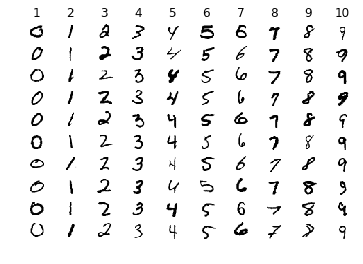

In [4]:
display_dataset()

### Mô hình Feed Forward sử dụng thư viện TensorFlow

** Mục đích: đối chiếu độ chính xác so với mô hình không sử dụng thư viện **

In [5]:
def feedforward_with_tensorflow(LEARNING_RATE=0.15,
                                LAMBDA=0.001,
                                NUM_EPOCHES=10,
                                BATCH_SIZE=64,
                                NUM_NEURONS=625):
    
    # Khai báo kích thước image vector và label vector
    X = tf.placeholder(tf.float32, [None, IMAGE_PIXELS])
    Y = tf.placeholder(tf.float32, [None, NUM_CLASSES])

    # Khai báo bộ trọng số W và bias của hidden layer và output layer
    Wh = tf.Variable(tf.random_normal([IMAGE_PIXELS, NUM_NEURONS]))
    Bh = tf.Variable(tf.ones([NUM_NEURONS]))
    Wo = tf.Variable(tf.random_normal([NUM_NEURONS, NUM_CLASSES]))
    Bo = tf.Variable(tf.ones([NUM_CLASSES]))

    # Truyền giá trị của các neurons trong lớp ẩn qua hàm phi tuyến sigmoid
    Ah = tf.nn.sigmoid(tf.add(tf.matmul(X, Wh), Bh))
    # Do lớp output sử dụng softmax nên không truyền qua hàm sigmoid
    Y_pred = tf.add(tf.matmul(Ah, Wo), Bo)

    # Khai báo hàm loss là hàm softmax cross entropy dùng để tính khoảng cách giữa hai phân bố xác suất + softmax
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=Y_pred, labels=Y))

    # Sử dụng L2 Regularization để hạn chế overfitting
    regularizer = (tf.nn.l2_loss(Wh) + tf.nn.l2_loss(Wo)) / BATCH_SIZE
    loss += LAMBDA * regularizer
    
    learning_rate = tf.placeholder(tf.float32, [])

    # Khai báo sử dụng phương pháp Gradient Descent để cực tiểu hàm loss
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(
        loss)

    # Khởi tạo Graph session trong TensorFlow
    sess = tf.InteractiveSession()

    # Khởi tạo các biến trong Graph
    tf.global_variables_initializer().run()

    # Lặp qua từng epoch để tính gradient
    for epoch in range(NUM_EPOCHES):
        avg_loss = 0.
        num_batches = mnist.train.num_examples // BATCH_SIZE
        for i in range(num_batches):
            batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)

            _, l = sess.run(
                [train_step, loss],
                feed_dict={
                    learning_rate: LEARNING_RATE / (epoch + 1),
                    X: batch_xs,
                    Y: batch_ys
                })

            avg_loss += l / num_batches
        print('Epoch: %d - Average loss: %f' % (epoch + 1, avg_loss))

    # Tính độ chính xác của mô hình
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_pred, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy: %f' % sess.run(
        accuracy, feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels}))

    sess.close()

### Mô hình Feed Forward không sử dụng thư viện

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))


# Hàm softmax cải tiến hạn chế tràn số khi z quá lớn (trừ z cho 1 giá trị c nào đó)
# Bài Softmax Regression của anh Vũ Hữu Tiệp (http://machinelearningcoban.com)
def softmax(z):
    ez = np.exp(z - np.max(z, axis = 1, keepdims = True))
    prob = ez / ez.sum(axis = 1, keepdims=True)
    return prob


def feedforward(LEARNING_RATE=0.15,
                LAMBDA=0.001,
                NUM_EPOCHES=10,
                BATCH_SIZE=64,
                NUM_NEURONS=625):

    # Khai báo bộ trọng số W và bias của hidden layer và output layer
    Wh = np.random.uniform(size=(IMAGE_PIXELS, NUM_NEURONS))
    Wo = np.random.uniform(size=(NUM_NEURONS, NUM_CLASSES))
    Bh = np.ones((1, NUM_NEURONS))
    Bo = np.ones((1, NUM_CLASSES))
    
    for epoch in range(NUM_EPOCHES):
        avg_loss = 0.
        
        # Tính tỉ lệ học theo epoch
        learning_rate = LEARNING_RATE / (epoch + 1)
        
        num_batches = mnist.train.num_examples // BATCH_SIZE
        for i in range(num_batches):
            batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
            
            # Bước forward propagation
            Zh = batch_xs.dot(Wh) + Bh
            Ah = sigmoid(Zh)
            
            Zo = Ah.dot(Wo) + Bo
            Ao = softmax(Zo)
            
            # Sử dụng cross-entropy để tính khoảng cách giữa hai phân bố xác suất
            l = -np.sum(batch_ys * np.log(Ao))
            # Sử dụng regularization để tránh overfitting
            l += LAMBDA / 2 * (np.sum(np.square(Wh)) + np.sum(np.square(Wo)))
            l /= BATCH_SIZE
            
            # Bước back propagation
            # Tính độ lệch giữa vector output layer và vector nhãn của ảnh
            Do = (Ao - batch_ys) / BATCH_SIZE
            dWo = (Ah.T).dot(Do)
            dBo = np.sum(Do, axis=0, keepdims=True)
            
            # Tính độ lệch giữa hidden layer và output layer
            Dh = Do.dot(Wo.T) * sigmoid_prime(Ah)
            dWh = (batch_xs.T).dot(Dh)
            dBh = np.sum(Dh, axis=0, keepdims=True)
            
            # Chỉ cộng regularization cho trọng số W (không tính cho bias)
            dWo += LAMBDA * Wo
            dWh += LAMBDA * Wh
            
            # Cập nhật bộ trọng theo gradient
            Wh -= learning_rate * dWh
            Bh -= learning_rate * dBh
            Wo -= learning_rate * dWo
            Bo -= learning_rate * dBo
            
            avg_loss += l / num_batches

        print('Epoch: %d - Average loss: %f' % (epoch + 1, avg_loss))
    
    # Tính độ chính xác của mô hình bằng Forward propagation
    Zh = mnist.test.images.dot(Wh) + Bh
    Ah = sigmoid(Zh)
    Zo = Ah.dot(Wo) + Bo
    Y_pred = softmax(Zo)
    accuracy = np.mean(Y_pred.argmax(axis=1) == mnist.test.labels.argmax(axis=1))
    print('Accuracy: %f' % accuracy)

## Thực nghiệm

Trong phần thực nghiệm, sinh viên sẽ thử nghiệm các trường hợp sau đồng thời cho cả 2 mô hình đã cài đặt ở trên:

|LEARNING_RATE|LAMBDA|NUM_EPOCHES|BATCH_SIZE|NUM_NEURONS|
|:-:|:-:|:-:|:-:|:-:|
|0.15|0.001|10|64|625|
|0.15|0.001|20|64|625|
|0.5|0.001|10|64|800|
|0.5|0.001|50|64|800|
|0.5|0.001|100|64|800|
|0.5|0.01|100|128|800|

In [7]:
feedforward()
feedforward_with_tensorflow()

Epoch: 1 - Average loss: 22.539472
Epoch: 2 - Average loss: 1.438772
Epoch: 3 - Average loss: 1.204928
Epoch: 4 - Average loss: 1.099773
Epoch: 5 - Average loss: 1.035490
Epoch: 6 - Average loss: 0.989169
Epoch: 7 - Average loss: 0.954900
Epoch: 8 - Average loss: 0.927398
Epoch: 9 - Average loss: 0.903989
Epoch: 10 - Average loss: 0.884199
Accuracy: 0.902600
Epoch: 1 - Average loss: 5.663398
Epoch: 2 - Average loss: 4.617252
Epoch: 3 - Average loss: 4.482999
Epoch: 4 - Average loss: 4.414029
Epoch: 5 - Average loss: 4.369126
Epoch: 6 - Average loss: 4.338417
Epoch: 7 - Average loss: 4.314091
Epoch: 8 - Average loss: 4.294353
Epoch: 9 - Average loss: 4.278798
Epoch: 10 - Average loss: 4.265497
Accuracy: 0.901400


In [10]:
feedforward(NUM_EPOCHES=20)
feedforward_with_tensorflow(NUM_EPOCHES=20)

Epoch: 1 - Average loss: 23.199943
Epoch: 2 - Average loss: 1.419865
Epoch: 3 - Average loss: 1.188474
Epoch: 4 - Average loss: 1.085249
Epoch: 5 - Average loss: 1.018902
Epoch: 6 - Average loss: 0.974557
Epoch: 7 - Average loss: 0.940356
Epoch: 8 - Average loss: 0.912668
Epoch: 9 - Average loss: 0.890290
Epoch: 10 - Average loss: 0.871628
Epoch: 11 - Average loss: 0.854816
Epoch: 12 - Average loss: 0.840740
Epoch: 13 - Average loss: 0.827877
Epoch: 14 - Average loss: 0.816222
Epoch: 15 - Average loss: 0.805704
Epoch: 16 - Average loss: 0.796413
Epoch: 17 - Average loss: 0.787479
Epoch: 18 - Average loss: 0.779330
Epoch: 19 - Average loss: 0.771874
Epoch: 20 - Average loss: 0.765134
Accuracy: 0.910500
Epoch: 1 - Average loss: 5.737067
Epoch: 2 - Average loss: 4.653694
Epoch: 3 - Average loss: 4.508295
Epoch: 4 - Average loss: 4.433784
Epoch: 5 - Average loss: 4.386568
Epoch: 6 - Average loss: 4.352578
Epoch: 7 - Average loss: 4.327379
Epoch: 8 - Average loss: 4.306161
Epoch: 9 - Averag

In [11]:
feedforward(LEARNING_RATE=0.5, NUM_NEURONS=800)
feedforward_with_tensorflow(LEARNING_RATE=0.5, NUM_NEURONS=800)

Epoch: 1 - Average loss: 14.283970
Epoch: 2 - Average loss: 0.853750
Epoch: 3 - Average loss: 0.643040
Epoch: 4 - Average loss: 0.549784
Epoch: 5 - Average loss: 0.496468
Epoch: 6 - Average loss: 0.460909
Epoch: 7 - Average loss: 0.436910
Epoch: 8 - Average loss: 0.417751
Epoch: 9 - Average loss: 0.403337
Epoch: 10 - Average loss: 0.391768
Accuracy: 0.927200
Epoch: 1 - Average loss: 6.680889
Epoch: 2 - Average loss: 5.348352
Epoch: 3 - Average loss: 5.166866
Epoch: 4 - Average loss: 5.081441
Epoch: 5 - Average loss: 5.027127
Epoch: 6 - Average loss: 4.990995
Epoch: 7 - Average loss: 4.963470
Epoch: 8 - Average loss: 4.941231
Epoch: 9 - Average loss: 4.923312
Epoch: 10 - Average loss: 4.907904
Accuracy: 0.932500


In [12]:
feedforward(LEARNING_RATE=0.5, NUM_EPOCHES=50, NUM_NEURONS=800)
feedforward_with_tensorflow(LEARNING_RATE=0.5, NUM_EPOCHES=50, NUM_NEURONS=800)

Epoch: 1 - Average loss: 14.112744
Epoch: 2 - Average loss: 0.851471
Epoch: 3 - Average loss: 0.643836
Epoch: 4 - Average loss: 0.551100
Epoch: 5 - Average loss: 0.498097
Epoch: 6 - Average loss: 0.463158
Epoch: 7 - Average loss: 0.438690
Epoch: 8 - Average loss: 0.419955
Epoch: 9 - Average loss: 0.404750
Epoch: 10 - Average loss: 0.393350
Epoch: 11 - Average loss: 0.384036
Epoch: 12 - Average loss: 0.375822
Epoch: 13 - Average loss: 0.368937
Epoch: 14 - Average loss: 0.363116
Epoch: 15 - Average loss: 0.357961
Epoch: 16 - Average loss: 0.353381
Epoch: 17 - Average loss: 0.349354
Epoch: 18 - Average loss: 0.345548
Epoch: 19 - Average loss: 0.342800
Epoch: 20 - Average loss: 0.339812
Epoch: 21 - Average loss: 0.337014
Epoch: 22 - Average loss: 0.334816
Epoch: 23 - Average loss: 0.332724
Epoch: 24 - Average loss: 0.330427
Epoch: 25 - Average loss: 0.328853
Epoch: 26 - Average loss: 0.327006
Epoch: 27 - Average loss: 0.325406
Epoch: 28 - Average loss: 0.324019
Epoch: 29 - Average loss: 0.

In [13]:
feedforward(LEARNING_RATE=0.5, NUM_EPOCHES=100, NUM_NEURONS=800)
feedforward_with_tensorflow(LEARNING_RATE=0.5, NUM_EPOCHES=100, NUM_NEURONS=800)

Epoch: 1 - Average loss: 14.335291
Epoch: 2 - Average loss: 0.857940
Epoch: 3 - Average loss: 0.645431
Epoch: 4 - Average loss: 0.550595
Epoch: 5 - Average loss: 0.498022
Epoch: 6 - Average loss: 0.462677
Epoch: 7 - Average loss: 0.437814
Epoch: 8 - Average loss: 0.418466
Epoch: 9 - Average loss: 0.403474
Epoch: 10 - Average loss: 0.392097
Epoch: 11 - Average loss: 0.382340
Epoch: 12 - Average loss: 0.374290
Epoch: 13 - Average loss: 0.367459
Epoch: 14 - Average loss: 0.361558
Epoch: 15 - Average loss: 0.356196
Epoch: 16 - Average loss: 0.351920
Epoch: 17 - Average loss: 0.347986
Epoch: 18 - Average loss: 0.344534
Epoch: 19 - Average loss: 0.341203
Epoch: 20 - Average loss: 0.338345
Epoch: 21 - Average loss: 0.335975
Epoch: 22 - Average loss: 0.333529
Epoch: 23 - Average loss: 0.331167
Epoch: 24 - Average loss: 0.329384
Epoch: 25 - Average loss: 0.327782
Epoch: 26 - Average loss: 0.326183
Epoch: 27 - Average loss: 0.324444
Epoch: 28 - Average loss: 0.323149
Epoch: 29 - Average loss: 0.

In [14]:
feedforward(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=100, BATCH_SIZE=128, NUM_NEURONS=800)
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=100, BATCH_SIZE=128, NUM_NEURONS=800)

Epoch: 1 - Average loss: 24.237172
Epoch: 2 - Average loss: 0.566677
Epoch: 3 - Average loss: 0.542913
Epoch: 4 - Average loss: 0.538591
Epoch: 5 - Average loss: 0.536267
Epoch: 6 - Average loss: 0.535305
Epoch: 7 - Average loss: 0.534270
Epoch: 8 - Average loss: 0.533833
Epoch: 9 - Average loss: 0.533464
Epoch: 10 - Average loss: 0.533380
Epoch: 11 - Average loss: 0.532849
Epoch: 12 - Average loss: 0.533136
Epoch: 13 - Average loss: 0.532668
Epoch: 14 - Average loss: 0.532282
Epoch: 15 - Average loss: 0.533041
Epoch: 16 - Average loss: 0.532186
Epoch: 17 - Average loss: 0.532748
Epoch: 18 - Average loss: 0.532064
Epoch: 19 - Average loss: 0.532535
Epoch: 20 - Average loss: 0.531954
Epoch: 21 - Average loss: 0.532066
Epoch: 22 - Average loss: 0.532023
Epoch: 23 - Average loss: 0.531650
Epoch: 24 - Average loss: 0.531792
Epoch: 25 - Average loss: 0.531709
Epoch: 26 - Average loss: 0.531877
Epoch: 27 - Average loss: 0.532071
Epoch: 28 - Average loss: 0.531267
Epoch: 29 - Average loss: 0.

## Nhận xét

1. Độ chính xác của 2 mô hình xấp xỉ nhau, điều đó cho thấy mô hình không sử dụng thư viện được cài đặt và hoạt động chính xác.

1. Hàm loss của mô hình tự cài đặt có thể khác 1 chút so với hàm loss của Tensorflow mặc dù cùng là cross-entropy loss. Điều này có thể nằm ở việc nhóm sử dụng hàm softmax cải tiến (trừ đi một hằng số c nào đó để tránh overflow). Bên cạnh đó, giá trị Average Loss còn phụ thuộc vào ma trận trọng số khởi tạo ban đầu, phân bố xác suất của hàm khởi tạo, tỉ lệ học,...

1. Do sử dụng chiến lược Mini-batch Gradient Descent với learning rate động nên nhìn chung hàm số không gặp khó khăn khi hội tụ. Có thể nhận thấy được bằng cách quan sát giá trị Average loss giảm dần theo số epoch, không có trường hợp bị ziczac hoặc không hội tụ.

1. Có thể tăng số lượng neurons trong lớp ẩn lên để mô hình có khả năng tổng quát hóa cao hơn. Nhưng lúc đó đòi hỏi một lượng lớn dữ liệu huấn luyện để hạn chế bị overfit.

1. Tuy chiến lược Mini-batch Gradient Descent nhìn có vẻ không tốt bằng Batch Gradient Descent do số điểm dữ liệu nhỏ hơn rất nhiều nhưng thực tế cho thấy chiến lược Mini-batch Gradient Descent vẫn có khả năng xấp xỉ tốt. Bởi vì trong thống kê, vẫn có thể dùng một mẫu nhỏ để xấp xỉ cho mẫu lớn nhưng cần phải chọn kích thước mẫu hợp lí và đảm bảo tính ngẫu nhiên của nó.

## Tài liệu tham khảo

1. http://yann.lecun.com/exdb/mnist/

1. https://www.tensorflow.org/get_started/get_started

1. http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/

1. http://machinelearningcoban.com/2017/02/17/softmax/#-softmax-regression-cho-mnist

1. http://machinelearningcoban.com/2017/02/24/mlp/#-tinh-toan-backpropagation